In [15]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# samples like: $1 - 9 * 5 / 8$	1 5 1 2 3 4	5	6

In [16]:
seq = '1−9∗5/8'

In [41]:
syn_dis = [1, 5, 1, 2, 3, 4]
len(syn_dis)

6

In [17]:
seq_len = len(seq)

In [18]:
seq_len

7

In [19]:
prob_action = {i:[] for i in range(seq_len)}

In [20]:
i = 0
with open('feval-analy_d5-sarnn.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'all' not in line_json:
            continue
        
        prob_action[i].append(line_json['all'])
        i += 1
        i %= seq_len

In [21]:
len(prob_action[0])

1028

# l/r : fraction of gates that are left/right saturated

In [22]:
in_l = {i:0 for i in range(seq_len)} 
in_r = {i:0 for i in range(seq_len)}
forget_l = {i:0 for i in range(seq_len)}
forget_r = {i:0 for i in range(seq_len)}
out_l = {i:0 for i in range(seq_len)}
out_r = {i:0 for i in range(seq_len)}
ngates = 0

In [23]:
i = 0
with open('feval-analy_d5-sarnn_lstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        t = line_json['t']
        ngates += 100
        for in_gate in line_json['i']:
            if in_gate > 0.9:
                in_r[t] += 1
            elif in_gate < 0.1:
                in_l[t] += 1
        
        for f_gate in line_json['f']:
            if f_gate > 0.9:
                forget_r[t] += 1
            elif f_gate < 0.1:
                forget_l[t] += 1
        
        for o_gate in line_json['o']:
            if o_gate > 0.9:
                out_r[t] += 1
            elif o_gate < 0.1:
                out_l[t] += 1

In [24]:
ngates = ngates/seq_len

In [25]:
ngates

102971.42857142857

In [26]:
step = []
for i in range(seq_len):
    step.append(np.array(prob_action[i]))

In [27]:
mean_dist = []
for i in range(seq_len):
    mean_dist.append(step[i].sum(0)/step[i].shape[0])

In [28]:
mean_dist[0]

array([3.29437851e-01, 1.93838683e-01, 2.38410469e-01, 4.50980386e-02,
       2.85477031e-02, 4.45311246e-02, 2.32297940e-04, 8.49067195e-02,
       7.71143903e-03, 7.01873773e-03, 1.85366245e-03, 1.84132754e-02])

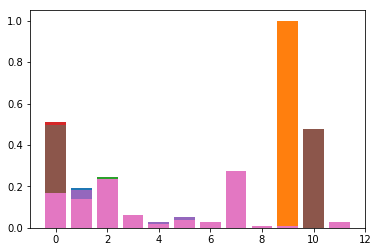

In [29]:
for i in range(seq_len):
    plt.bar(np.arange(12), mean_dist[i])

in_l: 0.3975083240843508
in_r: 0.23175360710321866
forget_l: 0.4593992785793563
forget_r: 0.16021920088790234
out_l: 0.44359877913429524
out_r: 0.1711348501664817


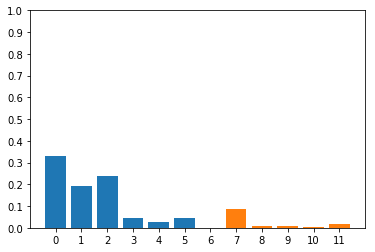

In [30]:
plt.bar(np.arange(6), mean_dist[0][:6])
plt.bar(np.arange(6, 12), mean_dist[0][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[0]/ngates)
print('in_r:', in_r[0]/ngates)
print('forget_l:', forget_l[0]/ngates)
print('forget_r:', forget_r[0]/ngates)
print('out_l:', out_l[0]/ngates)
print('out_r:', out_r[0]/ngates)

in_l: 0.38876803551609324
in_r: 0.5268548834628192
forget_l: 0.8677844062153164
forget_r: 0.06283296337402886
out_l: 0.40952136514983356
out_r: 0.4709753052164262


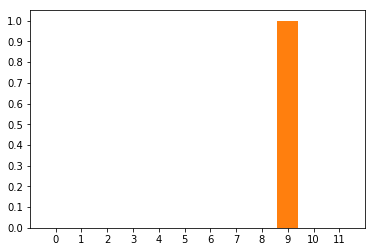

In [31]:
plt.bar(np.arange(6), mean_dist[1][:6])
plt.bar(np.arange(6, 12), mean_dist[1][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[1]/ngates)
print('in_r:', in_r[1]/ngates)
print('forget_l:', forget_l[1]/ngates)
print('forget_r:', forget_r[1]/ngates)
print('out_l:', out_l[1]/ngates)
print('out_r:', out_r[1]/ngates)

in_l: 0.3887000554938957
in_r: 0.30312291897891236
forget_l: 0.5944561598224196
forget_r: 0.16768729189789125
out_l: 0.537916204217536
out_r: 0.16675499445061046


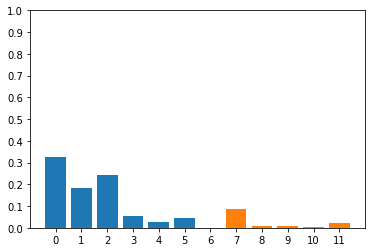

In [32]:
plt.bar(np.arange(6), mean_dist[2][:6])
plt.bar(np.arange(6, 12), mean_dist[2][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[2]/ngates)
print('in_r:', in_r[2]/ngates)
print('forget_l:', forget_l[2]/ngates)
print('forget_r:', forget_r[2]/ngates)
print('out_l:', out_l[2]/ngates)
print('out_r:', out_r[2]/ngates)

in_l: 0.6400416204217536
in_r: 0.26606409544950055
forget_l: 0.4864747502774695
forget_r: 0.3777455604883463
out_l: 0.5510557713651498
out_r: 0.3249056603773585


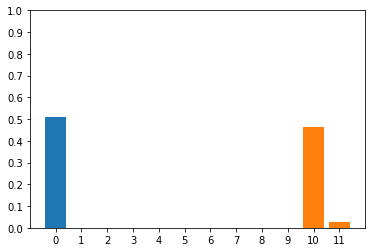

In [33]:
plt.bar(np.arange(6), mean_dist[3][:6])
plt.bar(np.arange(6, 12), mean_dist[3][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[3]/ngates)
print('in_r:', in_r[3]/ngates)
print('forget_l:', forget_l[3]/ngates)
print('forget_r:', forget_r[3]/ngates)
print('out_l:', out_l[3]/ngates)
print('out_r:', out_r[3]/ngates)

in_l: 0.6516953385127636
in_r: 0.15743201997780246
forget_l: 0.44735710321864597
forget_r: 0.3452219755826859
out_l: 0.4996337402885683
out_r: 0.2646559378468369


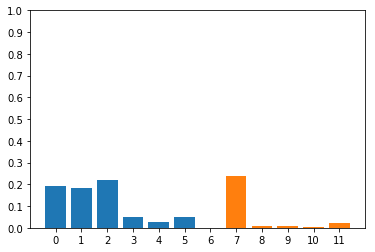

In [34]:
plt.bar(np.arange(6), mean_dist[4][:6])
plt.bar(np.arange(6, 12), mean_dist[4][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[4]/ngates)
print('in_r:', in_r[4]/ngates)
print('forget_l:', forget_l[4]/ngates)
print('forget_r:', forget_r[4]/ngates)
print('out_l:', out_l[4]/ngates)
print('out_r:', out_r[4]/ngates)

in_l: 0.6484031631520533
in_r: 0.2538276914539401
forget_l: 0.5398293562708102
forget_r: 0.331888179800222
out_l: 0.551784128745838
out_r: 0.3222350166481687


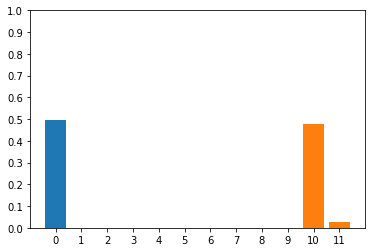

In [35]:
plt.bar(np.arange(6), mean_dist[5][:6])
plt.bar(np.arange(6, 12), mean_dist[5][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[5]/ngates)
print('in_r:', in_r[5]/ngates)
print('forget_l:', forget_l[5]/ngates)
print('forget_r:', forget_r[5]/ngates)
print('out_l:', out_l[5]/ngates)
print('out_r:', out_r[5]/ngates)

in_l: 0.6464997225305217
in_r: 0.15284822419533853
forget_l: 0.44214206437291903
forget_r: 0.33847253052164267
out_l: 0.5047905105438402
out_r: 0.25423557158712545


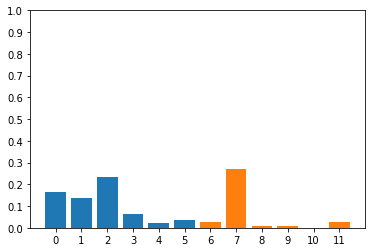

In [36]:
t=6
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

In [38]:
push = [mean_dist[t][6:].sum() for t in range(seq_len)]

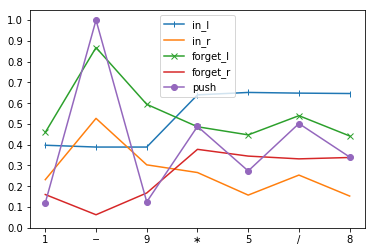

In [39]:
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

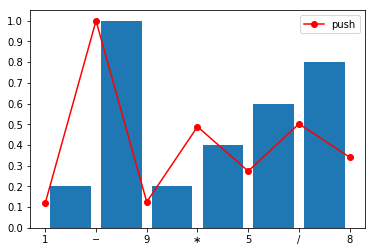

In [42]:
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o', color='red')
plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis))
plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()